# Fraud Detection Transactions

# 1. Project and Business Understanding

## Objective
Define the business problem and clarify customer goals from a business perspective.

### Business Problem
Financial institutions face significant losses due to fraudulent transactions. The goal is to detect and prevent fraud in real-time to reduce financial losses and maintain customer trust.

### Customer Goals
- Predict and minimize fraud-related financial losses.
- Reduce false positives to avoid inconveniencing legitimate customers.
- Optimize fraud detection for efficiency.
- Predict the risks score.

### Strategic Plan
- Build a predictive model using transaction data to identify fraud.
- Analyze key patterns such as transaction amount and location to enhance detection.

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from scipy.stats import skew
import warnings
warnings.filterwarnings('ignore')
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
from __future__ import print_function
import os

# 2. Data Understanding

## Objective
Understand the dataset to identify features that support real-time fraud detection.

### Describe Data
The dataset is synthetically generated to mirror real-world financial transactions across various users, locations and platforms. It has been designed to closely resemble data that would typically be collected by banks, fintech companies, or digital payment platforms for fraud detection purposes. The dataset used in this project is a single CSV file, `synthetic_fraud_dataset.csv`, containing financial transaction records. It includes 50000 rows and 21 columns, aimed at analyzing patterns to detect fraudulent transactions in real-time. The dataset captures various transaction details, including amounts, locations, and fraud indicators, across multiple users and locations worldwide.

#### Data Type Classification
- **Object Type**  
  - `Transaction_ID`: Unique identifier for each transaction.  
  - `User_ID`: Unique identifier for users.  
  - `Transaction_Type`: Type of transaction.  
  - `Device_Type`: Device used.  
  - `Location`: Transaction location.  
  - `Merchant_Category`: Merchant type.  
  - `Card_Type`: Card used.  
  - `Authentication_Method`: Authentication method.  
  - `Timestamp`: Date and time of the transaction.

- **Float Type**  
  - `Transaction_Amount`: Amount of the transaction.  
  - `Account_Balance`: User’s account balance post-transaction.  
  - `Avg_Transaction_Amount_7d`: Average transaction amount over 7 days.  
  - `Transaction_Distance`: Distance from usual location.  
  - `Risk_Score`: Pre-calculated risk score.

- **Integer Type**  
  - `IP_Address_Flag`: Suspicious IP indicator.  
  - `Previous_Fraudulent_Activity`: Past fraud by user.  
  - `Daily_Transaction_Count`: Number of transactions in a day.  
  - `Failed_Transaction_Count_7d`: Failed attempts over 7 days.  
  - `Card_Age`: Days since card issuance.  
  - `Is_Weekend`: Weekend transaction indicator.  
  - `Fraud_Label`: Fraud status.

### Statistical Data Types
- **Numerical (Continuous)**: `Transaction_Amount`, `Account_Balance`, `Avg_Transaction_Amount_7d`, `Transaction_Distance`, `Risk_Score`.  
- **Numerical (Discrete)**: `Daily_Transaction_Count`, `Failed_Transaction_Count_7d`, `Card_Age`.  
- **Categorical (Nominal)**: `Transaction_Type`, `Device_Type`, `Location`, `Merchant_Category`, `Card_Type`, `Authentication_Method`.  
- **Binary**: `IP_Address_Flag`, `Previous_Fraudulent_Activity`, `Is_Weekend`, `Fraud_Label`.  
- **Identifier**: `Transaction_ID`, `User_ID`.  
- **Temporal**: `Timestamp`.

#### Missing Values
Upon investigation, the dataset contains no missing values across all 50000 rows and 21 columns. Each column is fully populated, ensuring completeness for analysis.

#### X Variable
- Features influencing fraud detection: `Transaction_Amount`, `Transaction_Distance`, `Daily_Transaction_Count`, `Previous_Fraudulent_Activity`, etc. These represent transaction characteristics available in real-time.

#### Y Variable
- `IP_Address_Flag`: The target variable indicating whether a IP address is flag (1) or not (0).
- `Risk_Score`: The taget variable indicating fraud risk score computed for the transaction.
- `Fraud_Label`: The target variable indicating whether a transaction is fraudulent (1) or not (0), used to train and evaluate the fraud detection model.

In [11]:
data_path = ['C:/Users/winni/Downloads/archive']
filepath = os.sep.join(data_path + ['synthetic_fraud_dataset.csv'])
print(filepath)
df = pd.read_csv(filepath, sep=',')

C:/Users/winni/Downloads/archive\synthetic_fraud_dataset.csv


In [3]:
#Take a quick look at the data types.
df.shape

(50000, 21)

In [4]:
df.dtypes

Transaction_ID                   object
User_ID                          object
Transaction_Amount              float64
Transaction_Type                 object
Timestamp                        object
Account_Balance                 float64
Device_Type                      object
Location                         object
Merchant_Category                object
IP_Address_Flag                   int64
Previous_Fraudulent_Activity      int64
Daily_Transaction_Count           int64
Avg_Transaction_Amount_7d       float64
Failed_Transaction_Count_7d       int64
Card_Type                        object
Card_Age                          int64
Transaction_Distance            float64
Authentication_Method            object
Risk_Score                      float64
Is_Weekend                        int64
Fraud_Label                       int64
dtype: object

In [12]:
# Top 5 row
df.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,...,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,TXN_33553,USER_1834,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0,...,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0
1,TXN_9427,USER_7875,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,...,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1
2,TXN_199,USER_2734,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,...,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,...,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1
4,TXN_39489,USER_2014,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,...,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1


In [94]:
# Check data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transaction_ID                50000 non-null  object 
 1   User_ID                       50000 non-null  object 
 2   Transaction_Amount            50000 non-null  float64
 3   Transaction_Type              50000 non-null  object 
 4   Timestamp                     50000 non-null  object 
 5   Account_Balance               50000 non-null  float64
 6   Device_Type                   50000 non-null  object 
 7   Location                      50000 non-null  object 
 8   Merchant_Category             50000 non-null  object 
 9   IP_Address_Flag               50000 non-null  int64  
 10  Previous_Fraudulent_Activity  50000 non-null  int64  
 11  Daily_Transaction_Count       50000 non-null  int64  
 12  Avg_Transaction_Amount_7d     50000 non-null  float64
 13  F

In [9]:
# Summary statistics for numerical columns
print(df.describe())

       Transaction_Amount  Account_Balance  IP_Address_Flag  \
count        50000.000000     50000.000000      50000.00000   
mean            99.411012     50294.065981          0.05020   
std             98.687292     28760.458557          0.21836   
min              0.000000       500.480000          0.00000   
25%             28.677500     25355.995000          0.00000   
50%             69.660000     50384.430000          0.00000   
75%            138.852500     75115.135000          0.00000   
max           1174.140000     99998.310000          1.00000   

       Previous_Fraudulent_Activity  Daily_Transaction_Count  \
count                  50000.000000             50000.000000   
mean                       0.098400                 7.485240   
std                        0.297858                 4.039637   
min                        0.000000                 1.000000   
25%                        0.000000                 4.000000   
50%                        0.000000             

In [13]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Compute correlation matrix
corr_matrix = df[numerical_cols].corr()

# Display the result
print("\nCorrelation Matrix:\n", corr_matrix)


Correlation Matrix:
                               Transaction_Amount  Account_Balance  \
Transaction_Amount                      1.000000        -0.002380   
Account_Balance                        -0.002380         1.000000   
IP_Address_Flag                        -0.001620        -0.001210   
Previous_Fraudulent_Activity            0.001668        -0.002314   
Daily_Transaction_Count                 0.002149         0.006041   
Avg_Transaction_Amount_7d              -0.006255        -0.001738   
Failed_Transaction_Count_7d             0.001247        -0.000186   
Card_Age                                0.002294         0.000717   
Transaction_Distance                    0.007935         0.001748   
Risk_Score                              0.005606        -0.005262   
Is_Weekend                              0.001348         0.000557   
Fraud_Label                             0.001901        -0.003153   

                              IP_Address_Flag  Previous_Fraudulent_Activity  \
T

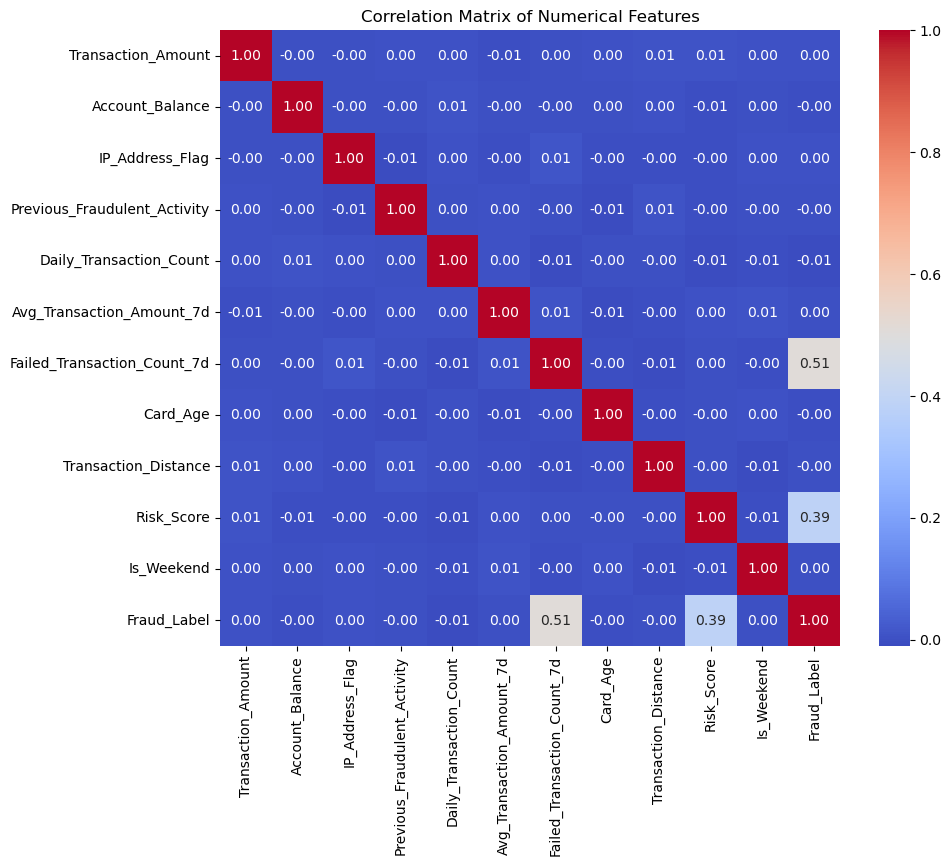

In [9]:
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

- Most numerical features show very weak or no correlation with each other and with the target variable (Fraud_Label), suggesting that they contribute independently to the model.
- Failed_Transaction_Count_7d shows a moderate positive correlation of 0.51 with Fraud_Label, indicating that users with more failed transaction attempts in the past 7 days are more likely to be involved in fraudulent activities.
- Risk_Score is also positively correlated with Fraud_Label (correlation = 0.39), supporting the validity of the risk score as a predictive feature for fraud detection.

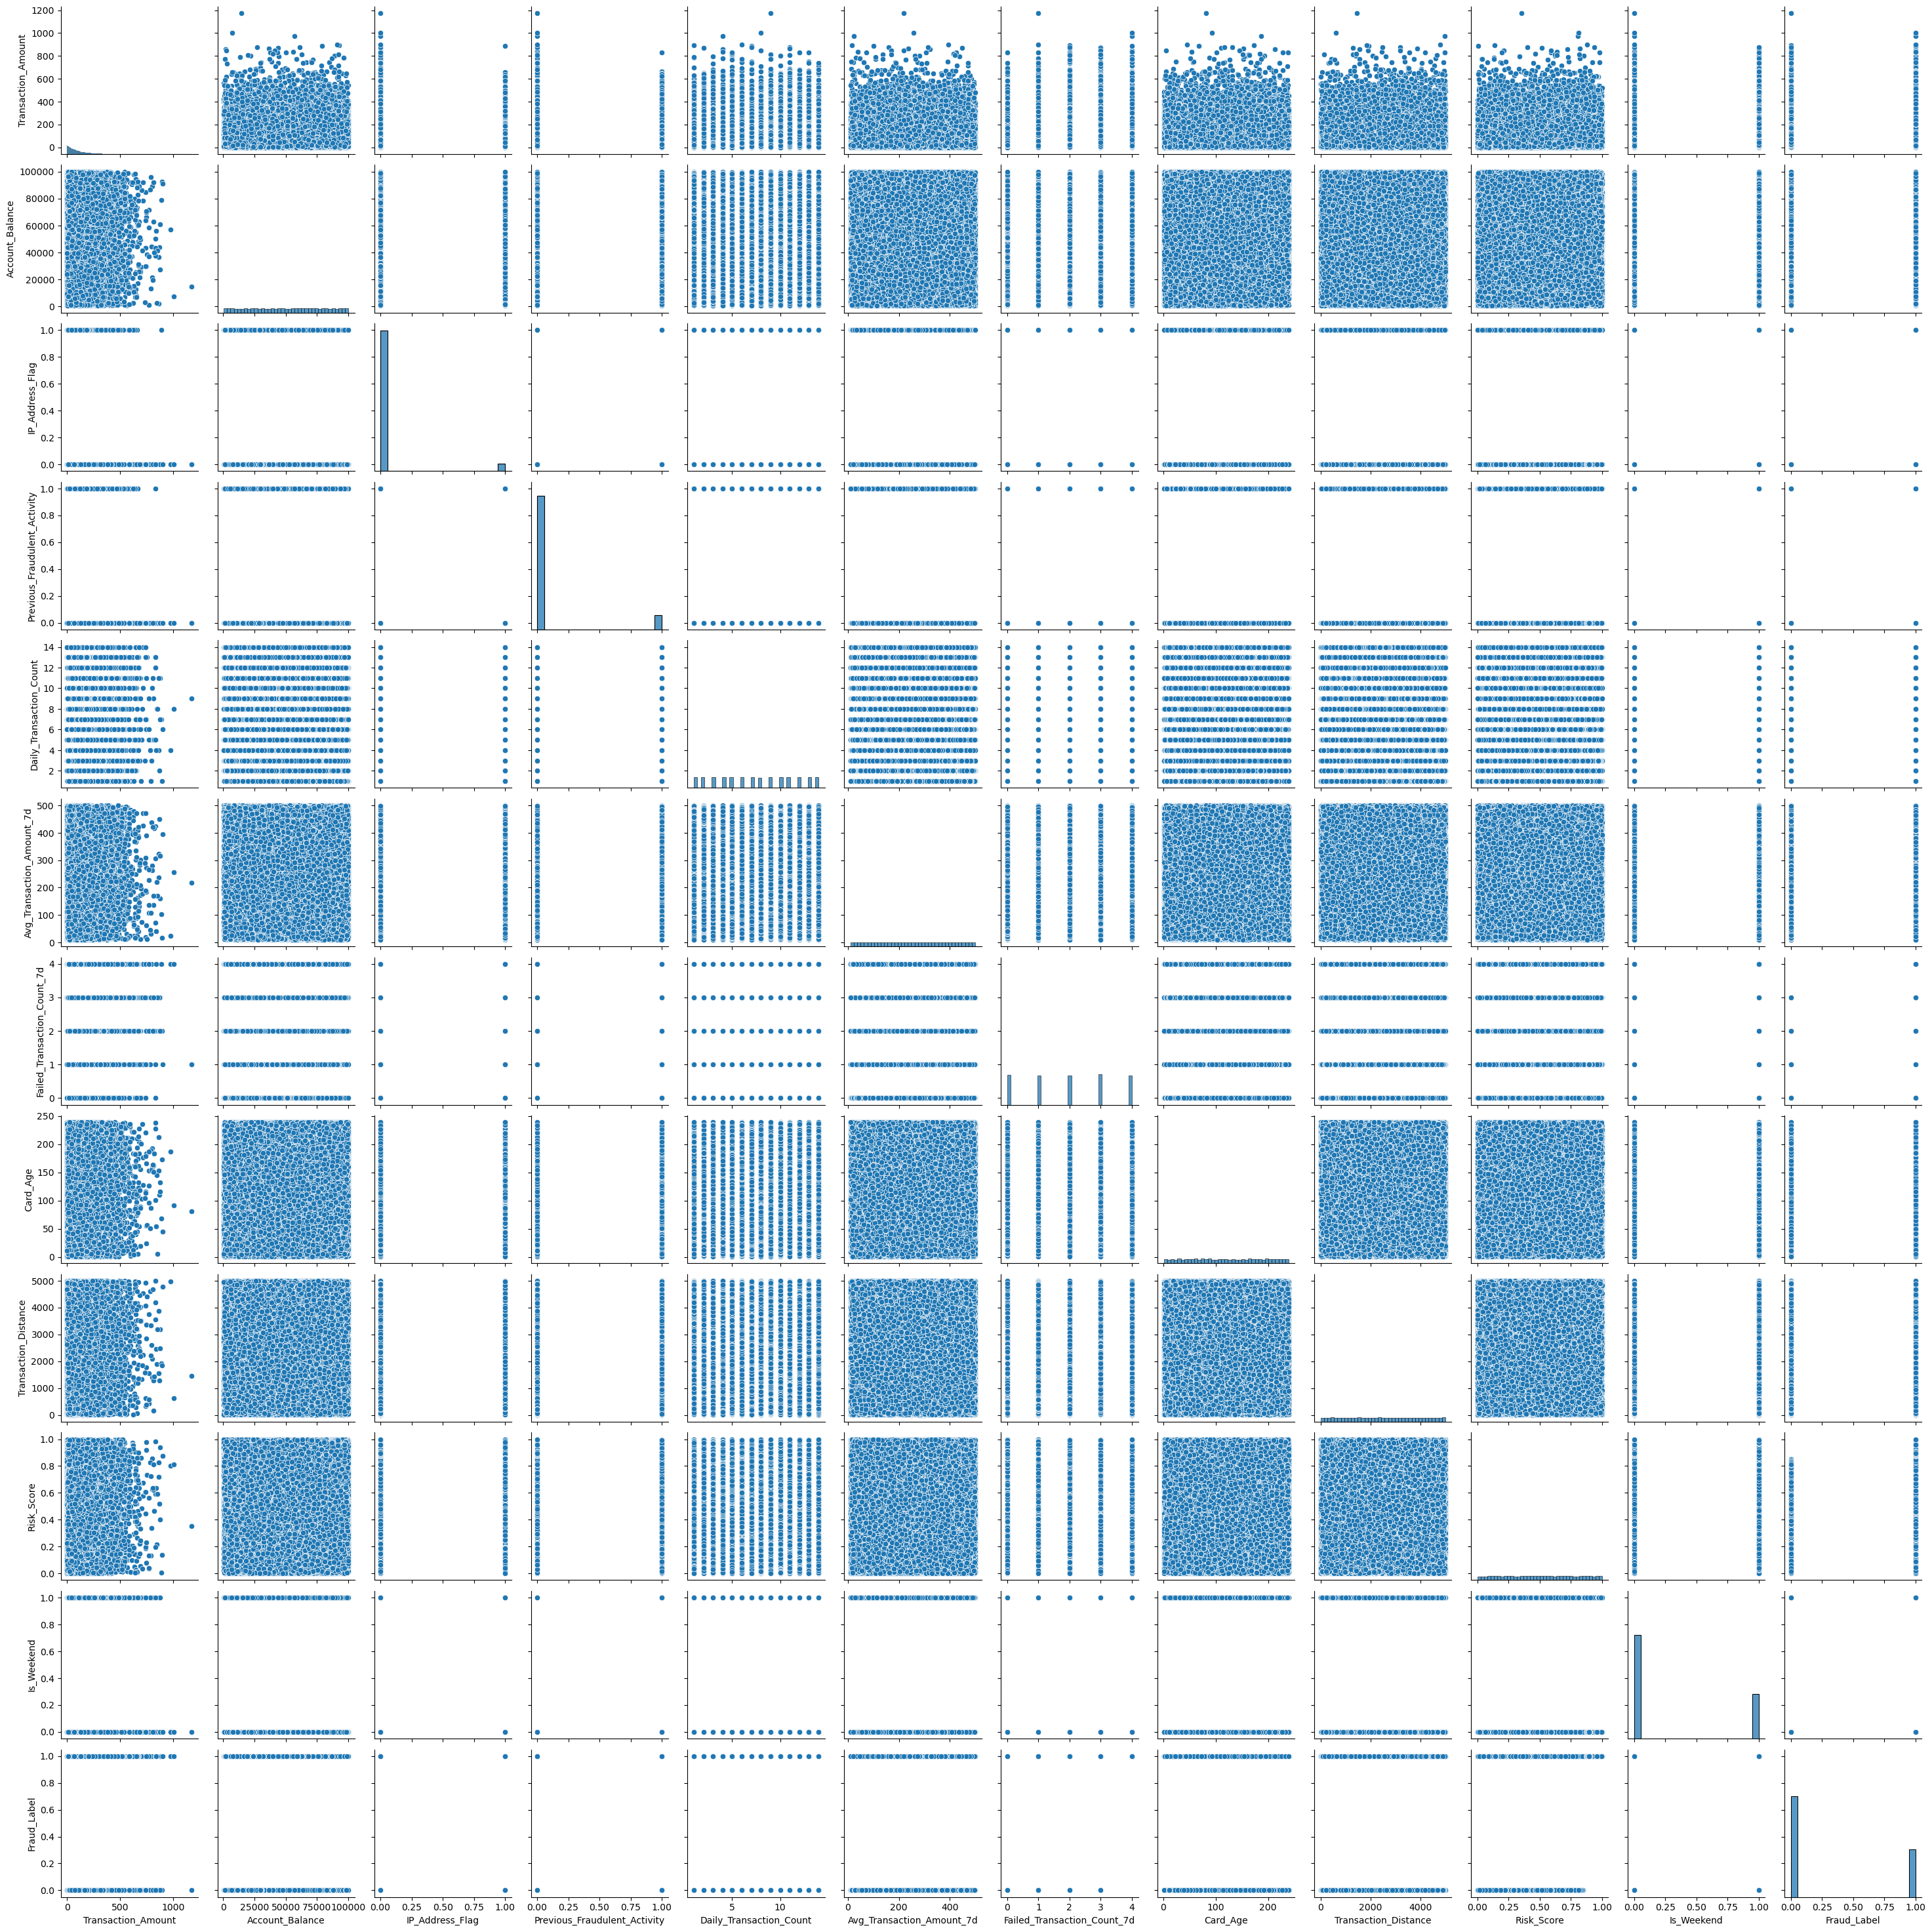

In [5]:
sns.pairplot(df)
plt.show()

In [15]:
# Check unique values in categorical columns
print(df['User_ID'].value_counts())
print(df['User_ID'].nunique())

print(df['Transaction_Type'].value_counts())
print(df['Transaction_Type'].nunique())

print(df['Device_Type'].value_counts())
print(df['Device_Type'].nunique())

print(df['Merchant_Category'].value_counts())
print(df['Merchant_Category'].nunique())

print(df['Card_Type'].value_counts())
print(df['Card_Type'].nunique())

print(df['Location'].value_counts())
print(df['Location'].nunique())

print(df['Authentication_Method'].value_counts())
print(df['Authentication_Method'].nunique())

print(df['Fraud_Label'].value_counts())

User_ID
USER_6599    16
USER_3925    16
USER_9998    16
USER_1027    15
USER_5014    15
             ..
USER_5685     1
USER_1806     1
USER_8563     1
USER_5057     1
USER_5580     1
Name: count, Length: 8963, dtype: int64
8963
Transaction_Type
POS               12549
Online            12546
ATM Withdrawal    12453
Bank Transfer     12452
Name: count, dtype: int64
4
Device_Type
Tablet    16779
Mobile    16640
Laptop    16581
Name: count, dtype: int64
3
Merchant_Category
Clothing       10033
Groceries      10019
Travel         10015
Restaurants     9976
Electronics     9957
Name: count, dtype: int64
5
Card_Type
Mastercard    12693
Visa          12560
Amex          12419
Discover      12328
Name: count, dtype: int64
4
Location
Tokyo       10208
Mumbai       9994
London       9945
Sydney       9938
New York     9915
Name: count, dtype: int64
5
Authentication_Method
Biometric    12591
PIN          12586
Password     12457
OTP          12366
Name: count, dtype: int64
4
Fraud_Label
0    339

In [15]:
# Check for missing values
print(df.isnull().sum())

Transaction_ID                  0
User_ID                         0
Transaction_Amount              0
Transaction_Type                0
Timestamp                       0
Account_Balance                 0
Device_Type                     0
Location                        0
Merchant_Category               0
IP_Address_Flag                 0
Previous_Fraudulent_Activity    0
Daily_Transaction_Count         0
Avg_Transaction_Amount_7d       0
Failed_Transaction_Count_7d     0
Card_Type                       0
Card_Age                        0
Transaction_Distance            0
Authentication_Method           0
Risk_Score                      0
Is_Weekend                      0
Fraud_Label                     0
dtype: int64


In [19]:
# Validate non-negative columns
numerical_cols = ['Transaction_Amount', 'Account_Balance', 'Avg_Transaction_Amount_7d', 'Transaction_Distance']
for col in numerical_cols:
    negatives = df[df[col] < 0].shape[0]
    print(f"Negative values in {col}: {negatives}")

Negative values in Transaction_Amount: 0
Negative values in Account_Balance: 0
Negative values in Avg_Transaction_Amount_7d: 0
Negative values in Transaction_Distance: 0


count    50000.000000
mean        99.411012
std         98.687292
min          0.000000
25%         28.677500
50%         69.660000
75%        138.852500
max       1174.140000
Name: Transaction_Amount, dtype: float64
Q1: 28.677500000000002
Q3: 138.8525
IQR: 110.17499999999998
Lower Bound: -136.58499999999998
Upper Bound: 304.115
Outliers in Transaction_Amount:
      Transaction_ID  Transaction_Amount  Fraud_Label
10         TXN_43106              367.50            0
55         TXN_49146              308.73            0
63         TXN_34657              306.60            0
73         TXN_26803              394.62            0
76         TXN_32207              363.86            0
...              ...                 ...          ...
49847      TXN_16198              485.13            0
49891      TXN_12666              336.14            0
49902      TXN_48984              411.42            1
49977       TXN_6396              384.47            1
49992      TXN_37194              315.08   

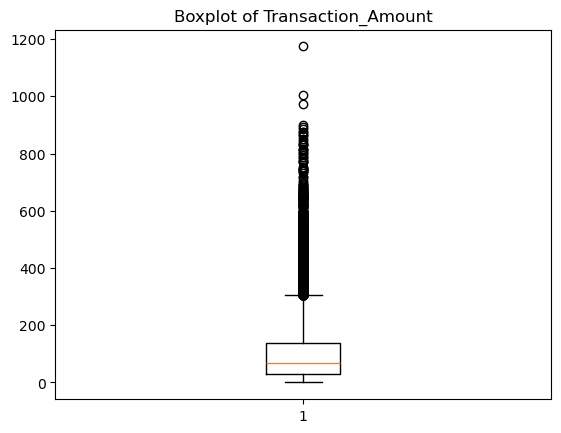

In [19]:
# Calculate Outlier
print(df['Transaction_Amount'].describe())

# Calculate Q1, Q3, and IQR
Q1 = df['Transaction_Amount'].quantile(0.25)
Q3 = df['Transaction_Amount'].quantile(0.75)
IQR = Q3 - Q1

print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

# Find outliers
outliers = df[(df['Transaction_Amount'] < lower_bound) | (df['Transaction_Amount'] > upper_bound)]

print("Outliers in Transaction_Amount:")
print(outliers[['Transaction_ID', 'Transaction_Amount', 'Fraud_Label']])
print(f"Number of outliers: {len(outliers)}")

plt.boxplot(df['Transaction_Amount'])
plt.title('Boxplot of Transaction_Amount')
plt.show()

### 

# 3. Data Preparation

In [106]:
# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extract hour and day from Timestamp
df['Hour'] = df['Timestamp'].dt.hour
df['Day_of_Week'] = df['Timestamp'].dt.dayofweek

In [108]:
# Check for duplicates
duplicates = df.duplicated(subset=['Transaction_ID']).sum()
print(f"Duplicates: {duplicates}")


Duplicates: 0


# 4. Modelling

# 5. Evaluation

# 6. Deployment Strategy

# 7. Dashboard and Visualization

# 8. Conclusion

# 9. References